In [1]:
import torch, torchvision

In [2]:
from matplotlib import pyplot as plt

In [3]:
torch.__version__, torch.cuda.is_available()

('1.3.1', True)

In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libs
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

import json
from detectron2.structures import BoxMode
import itertools
import os

In [5]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

--2019-11-18 04:10:46--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.10.171
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.10.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204,32K   663KB/s    in 0,3s    

2019-11-18 04:10:46 (663 KB/s) - ‘input.jpg’ saved [209222/209222]



In [5]:
im = cv2.imread('./input.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

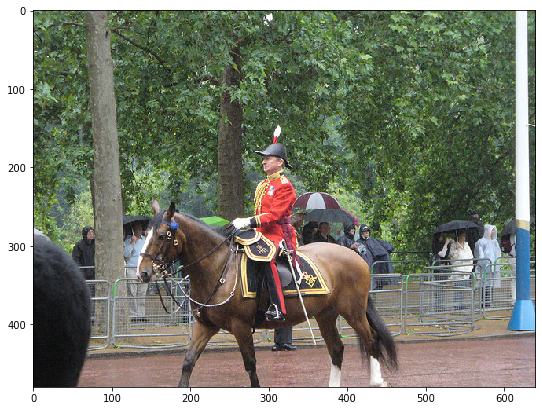

In [6]:
plt.figure(figsize=(9,9))
plt.imshow(im)

In [5]:
DETECTRON_PATH="/home/daniel/git/detectron2"

In [6]:
cfg = get_cfg()
cfg.merge_from_file(f"{DETECTRON_PATH}/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x_dnl.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.MODEL.WEIGHTS = "/home/daniel/git/course-v3/nbs/dl1/output/model_final.pth"
# checkpoint_path = "/home/daniel/git/course-v3/nbs/dl1/output/model_final.pth"
# model = build_model(cfg)  # returns a torch.nn.Module
# chpt = DetectionCheckpointer(model).load(checkpoint_path)
predictor = DefaultPredictor(cfg)

WARNING [12/02 06:31:42 d2.config.compat]: Config '/home/daniel/git/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x_dnl.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [7]:
predictor.model.eval()

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [50]:
outputs = predictor(im)

In [51]:
outputs["instances"].pred_boxes

Boxes(tensor([[2.5605e+02, 2.7848e+02, 2.8983e+02, 2.9830e+02],
        [3.3098e+02, 2.3151e+02, 3.9390e+02, 2.5737e+02],
        [4.1654e+02, 2.7452e+02, 4.2985e+02, 2.9180e+02],
        [4.9006e+01, 2.7475e+02, 7.9652e+01, 3.4408e+02],
        [2.9787e-02, 2.8988e+02, 7.8031e+01, 4.7953e+02]], device='cuda:0'))

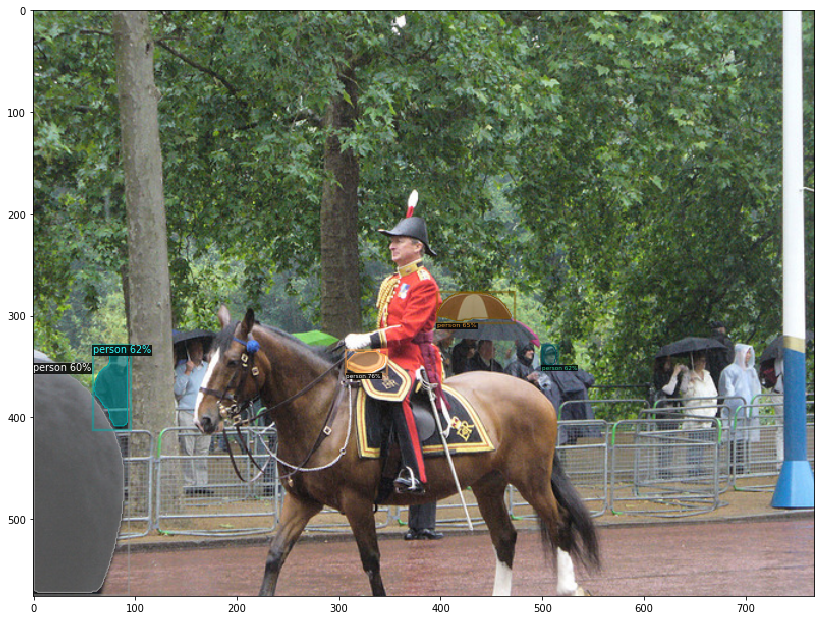

In [52]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(14,14))
plt.imshow(v.get_image()[:, :, ::-1])

## Own bar end image

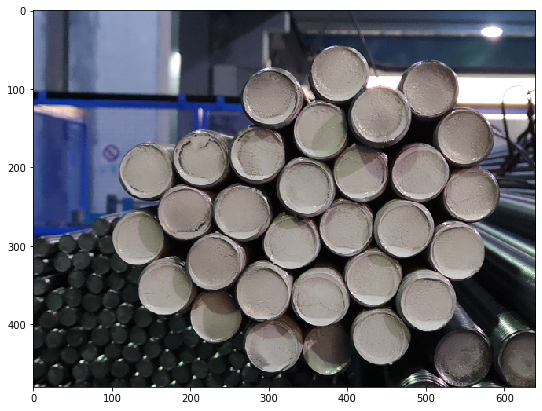

In [200]:
im2 = cv2.imread('./input3.jpg')
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,9))
plt.imshow(im2)

In [8]:
outputs2 = predictor(im2)

In [77]:
outputs2["instances"].pred_classes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], device='cuda:0')

## Preparing VGG Image Annotator-compatible output

The hierarchy containing output for VGG Image Annotation tool (in json)

In [ ]:
filename = "input3.jpg"
fs = 173835 # file size

Function that formats the annotation output for one image

Example structure:

In [140]:
ex_contours = {}
ex_contours['a'] = {"filename": "fileA.jpg", "size": len("fileA.jpg"), "file_attributes": {}, "regions": [
    {"shape_attributes": {
        "name": "polygon",
        "all_points_x": [1, 2, 3, 4, 5, 6],
        "all_points_y": [1, 2, 3, 4, 5, 6]
    },
    "region_attributes": {}}
]}

In [194]:
def get_polygon_annotations(path, filename, all_contours):
    return_dict = {"filename": filename,
               "size": os.path.getsize(os.path.join(path, filename)),
                  "file_attributes": {},
                  "regions": []}
    
    for contour in all_contours:
        # build regions subsection
        cont_xy = np.dsplit(contour[0], 2)
        shape = {"name": "polygon",
                "all_points_x": np.ravel(cont_xy[0]).tolist(),
                "all_points_y": np.ravel(cont_xy[1]).tolist()}
        region = {"shape_attributes": shape,
                 "region_attributes": {}}
        return_dict['regions'].append(region)
    
    return return_dict

In [81]:
all_contours = []
for pred_mask in outputs2["instances"].pred_masks:
    mask = np.array(pred_mask.cpu()).astype(np.uint8)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
    all_contours.append(contours)

In [195]:
json.dumps(get_polygon_annotations("/home/daniel/git/course-v3/nbs/dl1", "input3.jpg", all_contours))

'{"filename": "input3.jpg", "size": 155407, "file_attributes": {}, "regions": [{"shape_attributes": {"name": "polygon", "all_points_x": [486, 481, 475, 471, 461, 459, 456, 455, 455, 456, 457, 458, 462, 464, 465, 468, 470, 472, 477, 480, 486, 491, 497, 501, 504, 510, 514, 520, 523, 524, 525, 526, 527, 527, 526, 525, 523, 520, 511, 507, 501, 497], "all_points_y": [170, 171, 174, 177, 187, 190, 196, 200, 217, 221, 224, 226, 231, 233, 233, 236, 237, 238, 240, 241, 242, 243, 243, 242, 241, 238, 235, 229, 225, 223, 221, 218, 215, 199, 196, 193, 190, 186, 177, 174, 171, 170]}, "region_attributes": {}}, {"shape_attributes": {"name": "polygon", "all_points_x": [428, 425, 422, 415, 405, 400, 398, 397, 396, 396, 397, 398, 401, 403, 403, 405, 412, 417, 419, 422, 441, 444, 446, 449, 452, 459, 461, 465, 465, 467, 467, 466, 465, 463, 463, 462, 461, 459, 457, 441, 438], "all_points_y": [307, 308, 309, 312, 318, 323, 326, 330, 334, 340, 345, 349, 357, 359, 361, 364, 371, 374, 375, 376, 376, 375, 374, 3

## Preparing output for all files in one directory

The program will list all jpg files in a given directory. It will then build an annotation structure that contains the contours of all the bars found in the image files in the given directory.

In [204]:
img_dir = "/home/daniel/git/detectron2/datasets/BBL_combined/train"

In [210]:
annotation_output = {}
for file in os.listdir(img_dir):
    if str(file).endswith(".jpg"):
        img = cv2.imread(os.path.join(img_dir, file))
        outputs = predictor(img)

        file_contours = []
        for pred_mask in outputs["instances"].pred_masks:
            mask = np.array(pred_mask.cpu()).astype(np.uint8)
            _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
            file_contours.append(contours)


        annotation_file = get_polygon_annotations(img_dir, file, file_contours)
        
        annotation_output[f"{file}{os.path.getsize(os.path.join(img_dir, file))}"] = annotation_file

In [214]:
with open(os.path.join(img_dir, "annotations.json"), "w") as out_file:
    json.dump(annotation_output, out_file)

## Visualizing Contours

In [66]:
?cv2.drawContours

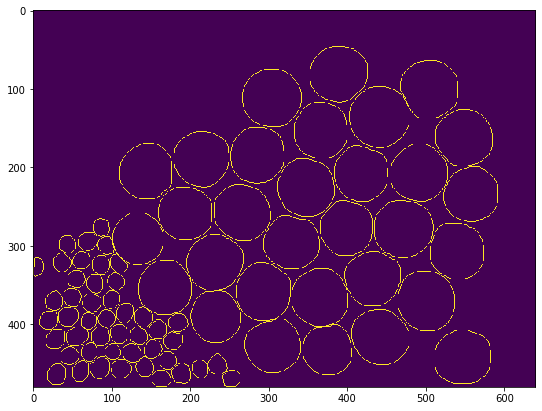

In [88]:
for cont in all_contours:
    drw = cv2.drawContours(mask, cont, -1, (255, 255, 255), 1)
plt.figure(figsize=(9,9))
plt.imshow(drw)

## Visualizing detectron2 output

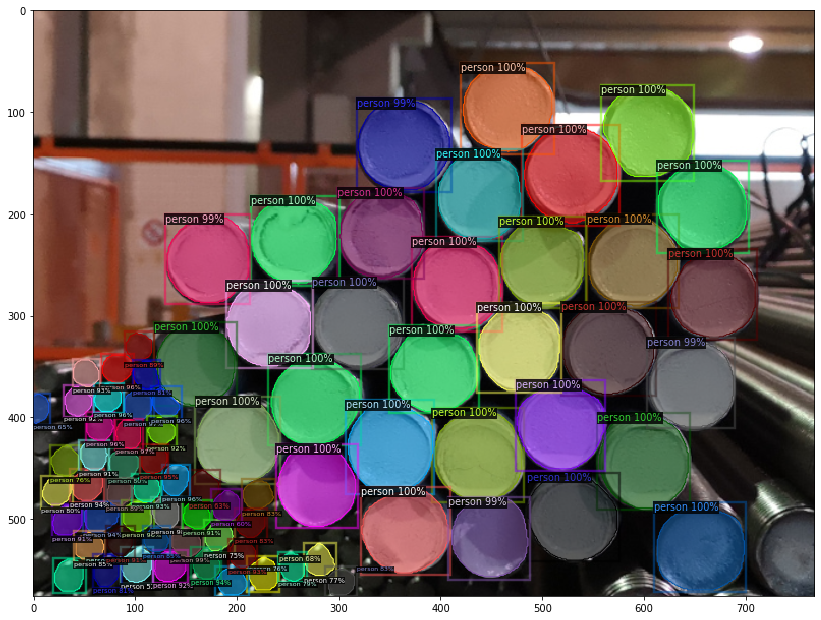

In [61]:
v = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs2["instances"].to("cpu"))
plt.figure(figsize=(14,14))
plt.imshow(v.get_image()[:, :, ::-1])

## Model training with own bar annotations

In [201]:
# write a function that loads the dataset into detectron2's standard format
def get_bar_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_export_json.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
#         print(annos[0])
        objs = []
        for anno in annos:
#             assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = list(itertools.chain.from_iterable(poly))

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog
# for d in ["train", "val"]:
#     DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
# balloon_metadata = MetadataCatalog.get("balloon_train")
d = "train"
DatasetCatalog.clear()
DatasetCatalog.register("bar_train", lambda d=d: get_bar_dicts("/home/daniel/git/detectron2/datasets/BBL_combined/train"))
MetadataCatalog.get("bar_train").set(thing_classes=["bar"])

bar_metadata = MetadataCatalog.get("bar_train")

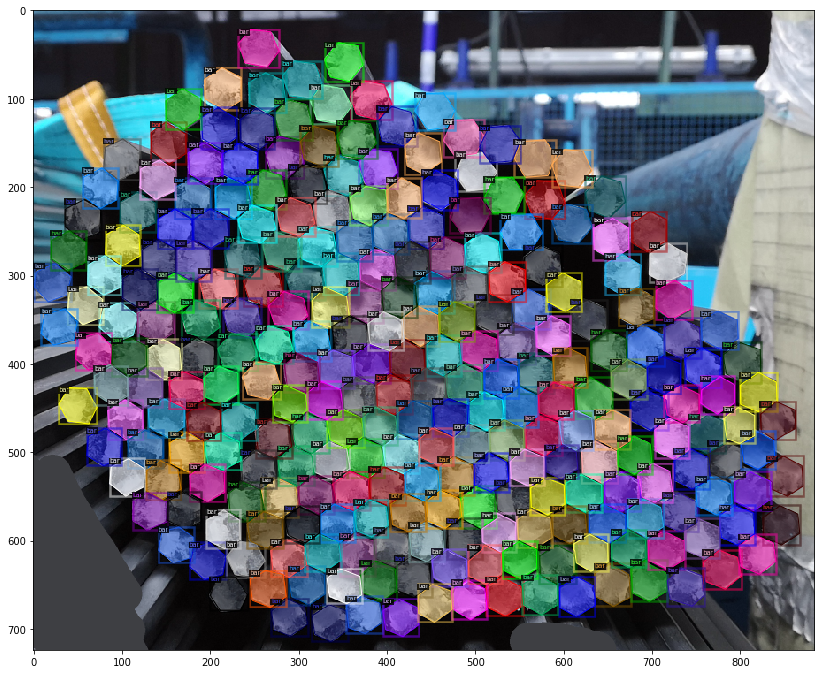

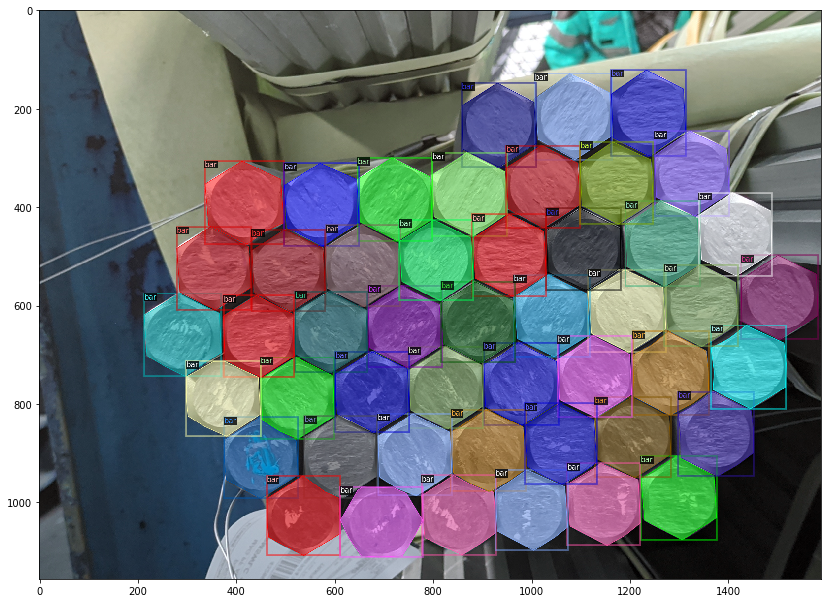

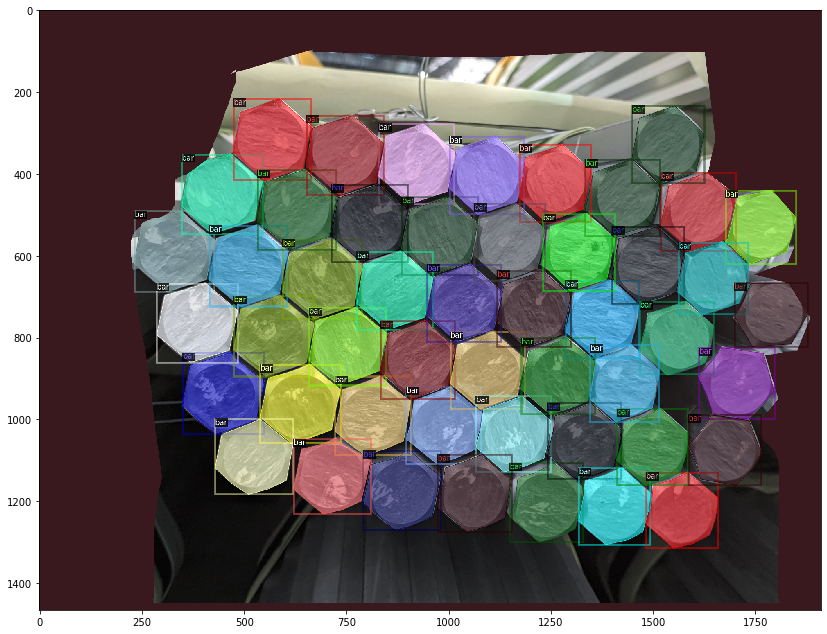

In [202]:
dataset_dicts = get_bar_dicts("/home/daniel/git/detectron2/datasets/BBL_combined/train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=bar_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(14,14))
    plt.imshow(vis.get_image()[:, :, ::-1])
#     cv2_imshow(vis.get_image()[:, :, ::-1])

## Train

In [9]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(f"{DETECTRON_PATH}/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("bar_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 100    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (bar)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

WARNING [11/23 23:36:54 d2.config.compat]: Config '/home/daniel/git/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[11/23 23:36:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): Basic

[11/23 23:36:56 d2.data.build]: Removed 0 images with no usable annotations. 12 images left.
[11/23 23:36:56 d2.data.build]: Distribution of training instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    bar     | 2032         |
|            |              |
[11/23 23:36:56 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/23 23:36:56 d2.data.build]: Using training sampler TrainingSampler


'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (2, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (2,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (4, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (4,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (1,) in the model! Skipped.


[11/23 23:36:56 d2.engine.train_loop]: Starting training from iteration 0
[11/23 23:37:03 d2.utils.events]: eta: 0:00:25  iter: 19  total_loss: 2.769  loss_cls: 0.738  loss_box_reg: 0.542  loss_mask: 0.691  loss_rpn_cls: 0.767  loss_rpn_loc: 0.114  time: 0.3240  data_time: 0.0224  lr: 0.000005  max_mem: 5237M
[11/23 23:37:09 d2.utils.events]: eta: 0:00:18  iter: 39  total_loss: 2.244  loss_cls: 0.693  loss_box_reg: 0.578  loss_mask: 0.672  loss_rpn_cls: 0.163  loss_rpn_loc: 0.101  time: 0.3147  data_time: 0.0368  lr: 0.000010  max_mem: 5237M
[11/23 23:37:15 d2.utils.events]: eta: 0:00:12  iter: 59  total_loss: 2.056  loss_cls: 0.628  loss_box_reg: 0.604  loss_mask: 0.632  loss_rpn_cls: 0.042  loss_rpn_loc: 0.087  time: 0.3189  data_time: 0.0302  lr: 0.000015  max_mem: 5237M
[11/23 23:37:22 d2.utils.events]: eta: 0:00:06  iter: 79  total_loss: 1.919  loss_cls: 0.564  loss_box_reg: 0.570  loss_mask: 0.586  loss_rpn_cls: 0.033  loss_rpn_loc: 0.080  time: 0.3209  data_time: 0.0299  lr: 0.0

OrderedDict()

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4   # set the testing threshold for this model
cfg.DATASETS.TEST = ("bar_train", )
predictor = DefaultPredictor(cfg)

193
tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')


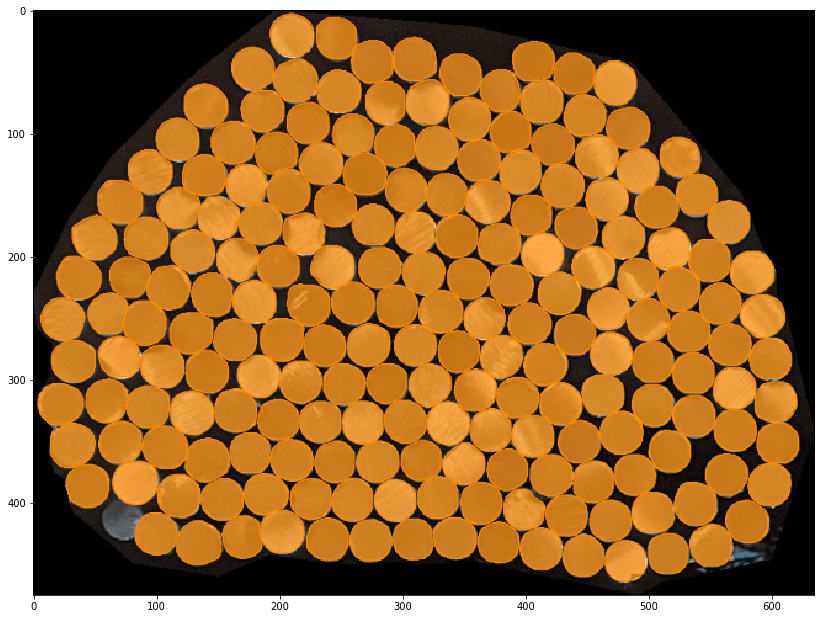

In [98]:
from detectron2.utils.visualizer import ColorMode
from matplotlib import colors
val_path = "/home/daniel/git/detectron2/datasets/BBL_combined/val"
dataset_dicts = os.listdir(val_path)
for d in random.sample(dataset_dicts, 1):
    im = cv2.imread(os.path.join(val_path, d))
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=None, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
#   v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    v = v.overlay_instances(
            masks=outputs["instances"].pred_masks[:].cpu(),
            boxes=None,
            labels=None,
            keypoints=None,
            assigned_colors=['#008CFF' for i in range(len(outputs["instances"]))],
            alpha=0.7
    )
    plt.figure(figsize=(14,14))
    plt.imshow(v.get_image()[:, :, ::-1])
    print(len(outputs["instances"]))
    print(outputs["instances"].pred_masks[1])

In [92]:
colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3